In [2]:
# 필수 패키지 설치
!pip install pandas openpyxl

# pandas 패키지 불러옴
import pandas as pd

# 데이터 파일 상대 경로 설정
file_path = "./한국어평가_최종데이터취합.xlsx"

# Excel 파일 불러옴
data = pd.ExcelFile(file_path)

# 시트 이름 출력
print("Available sheets:", data.sheet_names)

# "문법 결과" 시트 불러옴
df = data.parse('문법 결과')

# 데이터 첫 몇 행 출력
print("First few rows of the data:")
print(df.head())

Available sheets: ['문법 결과']
First few rows of the data:
   표본 ID 한국어 등급  문장수  명사 뒤에 조사가 없을 때  종결어미 오류  문장 내에 용언이 없을 때  \
0     54     1급   11               5        0               4   
1     56     1급   12               6        0               5   
2     57     1급   11               0        0               1   
3     58     1급   10               1        0               1   
4     59     1급   14               2        0               1   

   obj에 목적격 조사가 없을 때  체언에 주격 조사가 없을 때  문장에 체언이 없을 때  표현  ...  부사점수.1  시소러스 총점  \
0                  2                0             9   0  ...       0        4   
1                  1                0            12   3  ...       0        9   
2                  2                0            10   1  ...       0        2   
3                  1                0             9   0  ...       0        7   
4                  1                0            13   1  ...       2        9   

   말음  유기음  구개음  경음  네이버 길이  네이버 오류  symspell 길이  symspell 오류  
0 

1. 데이터 기본 정보
<class 'pandas.core.frame.DataFrame'>
Index: 26642 entries, 0 to 26762
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   표본 ID              26642 non-null  int64  
 1   한국어 등급             26642 non-null  int64  
 2   문장수                26642 non-null  int64  
 3   명사 뒤에 조사가 없을 때     26642 non-null  int64  
 4   종결어미 오류            26642 non-null  int64  
 5   문장 내에 용언이 없을 때     26642 non-null  int64  
 6   obj에 목적격 조사가 없을 때  26642 non-null  int64  
 7   체언에 주격 조사가 없을 때    26642 non-null  int64  
 8   문장에 체언이 없을 때       26642 non-null  int64  
 9   표현                 26642 non-null  int64  
 10  조사                 26642 non-null  int64  
 11  선어말어미              26642 non-null  int64  
 12  연결어미               26642 non-null  int64  
 13  종결어미               26642 non-null  int64  
 14  전성어미               26642 non-null  int64  
 15  명사점수               26642 non-null  int64  
 16  동사점수          

/home/ktl/temp/anaconda3/envs/knlp/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/ktl/temp/anaconda3/envs/knlp/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/ktl/temp/anaconda3/envs/knlp/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/ktl/temp/anaconda3/envs/knlp/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/ktl/temp/anaconda3/envs/knlp/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/ktl/temp/anaconda3/envs/knlp/lib/python3.10/s

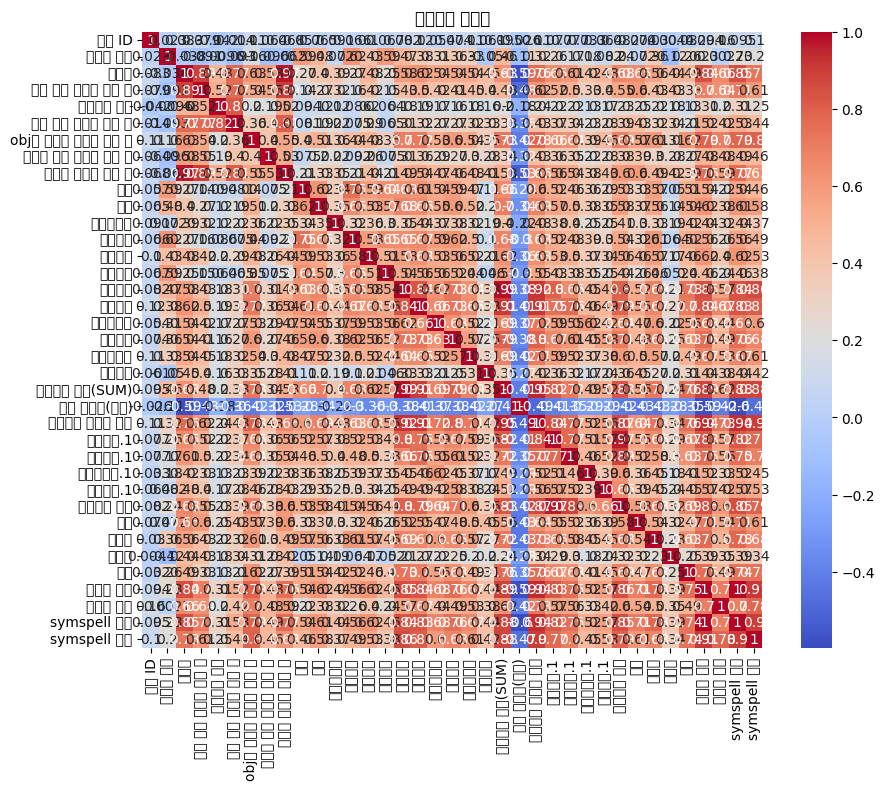


8. 데이터 샘플
       표본 ID  한국어 등급  문장수  명사 뒤에 조사가 없을 때  종결어미 오류  문장 내에 용언이 없을 때  \
20430  26512       4   13               3        0               0   
9417   10967       1    9               0        0               0   
23907  31475       6   14               0        0               0   
10099  11734       1   10               2        0               0   
1010    1080       4   14               1        0               0   

       obj에 목적격 조사가 없을 때  체언에 주격 조사가 없을 때  문장에 체언이 없을 때  표현  ...  부사점수.1  \
20430                  3                0            12  20  ...       2   
9417                   1                1             6   1  ...       0   
23907                  4                0            11  42  ...       0   
10099                  0                0             9   3  ...       0   
1010                   4                1             5  40  ...       0   

       시소러스 총점  말음  유기음  구개음  경음  네이버 길이  네이버 오류  symspell 길이  symspell 오류  
20430       12   0    2    0  21  

In [5]:
# 필수 패키지 설치
!pip install pandas openpyxl matplotlib seaborn

# 데이터 전반적 내용 확인
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 구조 및 기본 정보 출력
print("1. 데이터 기본 정보")
print(df.info())

print("\n2. 데이터 통계 요약")
print(df.describe(include='all'))  # 숫자형, 범주형 모두 포함

# 결측치 분석
print("\n3. 결측치 확인")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# 중복 데이터 확인
print("\n4. 중복 데이터 개수")
duplicate_count = df.duplicated().sum()
print(f"중복 데이터 개수: {duplicate_count}")

# 각 열의 고유값 확인 (범주형 데이터 탐색)
print("\n5. 각 열의 고유값 개수")
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values}개 고유값")

# 범주형 데이터 분포 시각화
print("\n6. 범주형 데이터 분포 시각화")
categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    df[column].value_counts().plot(kind='bar', title=f"{column} 분포", rot=45)
    plt.show()

# 상관관계 분석
print("\n7. 숫자형 데이터 상관관계")
correlation_matrix = df.corr()
print(correlation_matrix)

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("상관관계 히트맵")
plt.show()

# 데이터 샘플 확인
print("\n8. 데이터 샘플")
print(df.sample(5))


In [4]:
# 데이터 전처리 시작
print("데이터 전처리 시작")

# '한국어 등급'에서 "정보 없음" 및 "6급 이상" 제거
df = df[(df['한국어 등급'] != '정보 없음') & (df['한국어 등급'] != '6급 이상')]

# '한국어 등급' 열 숫자형 변환 (예: "1급" → 1)
df['한국어 등급'] = df['한국어 등급'].str.replace("급", "").astype(int)

# 변환된 결과 확인
print("\n'한국어 등급' 열 변환 후 고유값:")
print(df['한국어 등급'].value_counts())

print("데이터 전처리 완료")


데이터 전처리 시작

'한국어 등급' 열 변환 후 고유값:
한국어 등급
1    6315
2    5443
3    4753
4    4096
5    3286
6    2749
Name: count, dtype: int64
데이터 전처리 완료


/tmp/ipykernel_578385/4091678156.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['한국어 등급'] = df['한국어 등급'].str.replace("급", "").astype(int)


In [ ]:
# matplotlib 한글 폰트 설정
!fc-cache -fv  # 폰트 캐시 갱신

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 설정
plt.rc('font', family='NanumGothic')

# 히트맵 시각화 다시 수행
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("상관관계 히트맵")
plt.show()
